# Proyecto Integrador

## Simón Madrid Marcela Díaz, Javier Patiño, Rafael Gil, Alejandro Arboleda.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, log_loss, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [88]:
# Cargamos los Datos
data = pd.read_excel('Datos/BaseScoreRetanqueo.xlsx')

In [89]:
#Examinamos las columnas que tiene el DataFrame
data.columns

Index(['Tipo Documento', 'Cedula', 'num obl', 'Primer credito',
       'Fecha inicio primer credito', 'Segundo crédito',
       'Fecha inicio segundo crédito', 'Genero', 'Zona', 'Departamento',
       'Personas a cargo', 'Nivel de estudio', 'Estado civil',
       'Fecha de nacimiento', 'Edad (Segundo credito)', 'Antigüedad laboral',
       'Tipo de cliente', '1_Marca', '1_Capacidad de pago*', '1_ScoreRiesgos',
       '1_Cantidad Moras 30', '1_Cantidad Moras 60', '1_Cantidad Moras 90',
       '1_Cantidad Moras Mayor 120', '1_Cantidad Moras 30 Ultimos 6 Meses',
       '1_Cantidad Moras 60 Ultimos 6 Meses',
       '1_Cantidad Moras 90 Ultimos 6 Meses',
       '1_Cantidad Moras Mayor 120 Ultimos 6 Meses', '1_Valor Desembolso',
       '1_Valor Cuota', '2_Marca', '2_Capacidad de pago*', '2_ScoreRiesgos',
       '2_Cantidad Moras 30', '2_Cantidad Moras 60', '2_Cantidad Moras 90',
       '2_Cantidad Moras Mayor 120', '2_Cantidad Moras 30 Ultimos 6 Meses',
       '2_Cantidad Moras 60 Ultimos 6 

La variable que buscamos predecir es Default, esta variable nos da cuenta de los clientes que tuvieron un buen habito de pago en su crédito. Buen habito (0) y mal habito (1) 

Percentage of 0: 71.27 %
Percentage of 1: 28.73 %


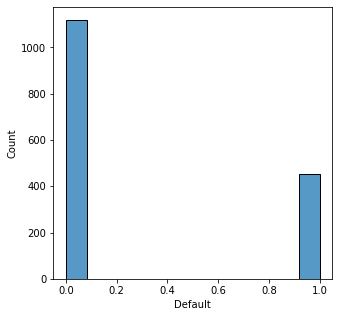

In [90]:
# Analisis de la variable Default

total = len(data)
total_ceros = data.Default[data.Default == 0].count()
total_unos = data.Default[data.Default == 1].count()

fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(data.Default)
print('Percentage of 0: {:.2f} %'.format(100*total_ceros/total))
print('Percentage of 1: {:.2f} %'.format(100*total_unos/total))

Podemos observar que la variable Default, solo tiene ceros y unos. Además, sus etiquetas están un poco desbalanceadas a favor de los unos, es decir hubo más clientes con buen habito de pago en su primer crédito. Ya descrita la variable objetivo, vamos a analizar las variables predictoras separándolas en variables numéricas y categóricas.

## Variables Numericas

In [91]:
data_numerica = data[['Personas a cargo','Edad (Segundo credito)','Antigüedad laboral','1_ScoreRiesgos','1_Cantidad Moras 30', '1_Cantidad Moras 60', '1_Cantidad Moras 90',
'1_Cantidad Moras Mayor 120', '1_Cantidad Moras 30 Ultimos 6 Meses','1_Cantidad Moras 60 Ultimos 6 Meses','1_Cantidad Moras 90 Ultimos 6 Meses','1_Cantidad Moras Mayor 120 Ultimos 6 Meses', '1_Valor Desembolso',
'1_Valor Cuota', '2_Capacidad de pago*', '2_ScoreRiesgos','2_Cantidad Moras 30', '2_Cantidad Moras 60', '2_Cantidad Moras 90','2_Cantidad Moras Mayor 120', '2_Cantidad Moras 30 Ultimos 6 Meses',
'2_Cantidad Moras 60 Ultimos 6 Meses','2_Cantidad Moras 90 Ultimos 6 Meses','2_Cantidad Moras Mayor 120 Ultimos 6 Meses', '2_Valor Desembolso','2_Valor Cuota', 'Default']]

In [92]:
data_numerica

,Personas a cargo,Edad (Segundo credito),Antigüedad laboral,1_ScoreRiesgos,1_Cantidad Moras 30,1_Cantidad Moras 60,1_Cantidad Moras 90,1_Cantidad Moras Mayor 120,1_Cantidad Moras 30 Ultimos 6 Meses,1_Cantidad Moras 60 Ultimos 6 Meses,...,2_Cantidad Moras 60,2_Cantidad Moras 90,2_Cantidad Moras Mayor 120,2_Cantidad Moras 30 Ultimos 6 Meses,2_Cantidad Moras 60 Ultimos 6 Meses,2_Cantidad Moras 90 Ultimos 6 Meses,2_Cantidad Moras Mayor 120 Ultimos 6 Meses,2_Valor Desembolso,2_Valor Cuota,Default
0,0,26,6,47.16,1,0,0,0,1,0,...,0,0,0,0,0,0,0,6099000.0,327410,0
1,0,28,61,49.90,0,0,0,0,0,0,...,2,0,0,0,0,0,0,5865092.3,228479,0
2,0,23,21,-2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,13452120.0,677161,0
3,1,23,50,54.00,4,2,1,4,0,1,...,1,0,0,0,1,0,0,3780220.0,173208,1
4,0,25,11,50.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4999000.0,217658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,0,32,36,56.69,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9745198.0,647745,0
1566,1,27,2,66.79,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6650000.0,408005,0
1567,0,24,2,55.93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4550000.0,292390,0
1568,0,29,41,58.49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4600000.0,293875,0


In [95]:
#Analizamos las correlacion de cada variable con la variable Default, usando el coeficiente de Kendall que es mas robusto que el de Pearson

corr_df = data_numerica.corr(method='kendall')
corr_df['Default']

Personas a cargo                              0.220740
Edad (Segundo credito)                       -0.040261
Antigüedad laboral                            0.004626
1_ScoreRiesgos                               -0.036207
1_Cantidad Moras 30                           0.355464
1_Cantidad Moras 60                           0.492984
1_Cantidad Moras 90                           0.580309
1_Cantidad Moras Mayor 120                    0.521025
1_Cantidad Moras 30 Ultimos 6 Meses           0.352210
1_Cantidad Moras 60 Ultimos 6 Meses           0.504800
1_Cantidad Moras 90 Ultimos 6 Meses           0.559666
1_Cantidad Moras Mayor 120 Ultimos 6 Meses    0.528333
1_Valor Desembolso                            0.055067
1_Valor Cuota                                 0.015529
2_Capacidad de pago*                         -0.058481
2_ScoreRiesgos                               -0.198894
2_Cantidad Moras 30                           0.591510
2_Cantidad Moras 60                           0.777678
2_Cantidad

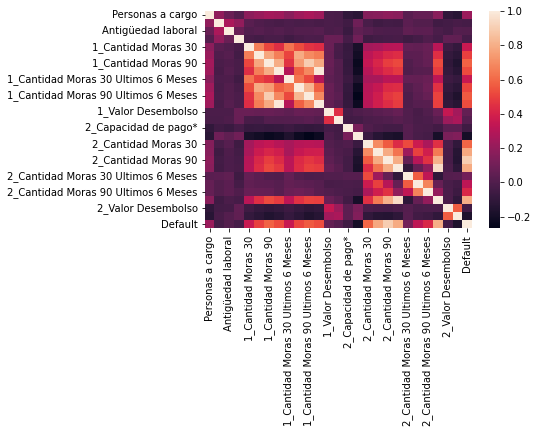

In [96]:
sns.heatmap(corr_df);

## Variables categoricas

Vamos a analizar las variables categóricas, lo primero es observar cuantas clases hay por cada variable y si realmente tienen relevancia. Luego vamos a aplicar un Encoder para pasar las variables de categórica a numéricas, para ser usadas posteriormente en los modelos.    

In [97]:
data_categoria = data[['Tipo Documento', 'Genero', 'Zona', 'Departamento', 'Estado civil','Tipo de cliente','1_Marca','2_Marca']]

In [98]:
keys = data_categoria.columns
for label, content in data_categoria.items():
    print('Number of Unique values for {} =  {} {}'.format(label,len(content.unique()),content.unique()))

Number of Unique values for Tipo Documento =  3 ['CC' 'CE' 'PASA']
Number of Unique values for Genero =  2 ['M' 'F']
Number of Unique values for Zona =  7 ['ZONA BOGOTA' 'ZONA ANTIOQUIA' 'ZONA COSTA' 'ZONA CENTRO'
 'ZONA SUROCCIDENTE' 'ZONA EJE CAFETERO' 'ZONA ORIENTE']
Number of Unique values for Departamento =  22 ['Bogotá D.C' 'Antioquia' 'Cesar' 'Córdoba' 'Cundinamarca' 'Risaralda'
 'Valle del Cauca' 'Tolima' 'Meta' 'Magdalena' 'Atlántico' 'Bolívar'
 'Huila' 'Norte de Santander' 'Santander' 'Sucre' 'Caldas' 'Cauca'
 'Quindio' 'Boyacá' 'Caquetá' 'Casanare']
Number of Unique values for Estado civil =  5 ['Unión Libre' 'Soltero(a)' 'Casado(a)' 'Divorciado(a)' 'Viudo(a)']
Number of Unique values for Tipo de cliente =  4 ['Empleado Formal' 'Empleado Informal' 'Independiente' 'Pensionado']
Number of Unique values for 1_Marca =  16 ['AUTECO' 'VICTORY' 'KYMCO' 'HONDA' 'YAMAHA' 'KAWASAKI' 'SUZUKI' 'TVS'
 'SUYO' 'KTM' 'STARKER' 'BENELLI' 'HERO' 'SYM' 'COMBAT' 'CERONTE']
Number of Unique valu

In [99]:
ord_enc = OrdinalEncoder()
categorical_ord = data_categoria.copy(deep=True)
for label, content in data_categoria.items():
    print(label)
    categorical_ord[label+'_ord'] =  ord_enc.fit_transform(data_categoria[[label]])
categorical_ord['Default1'] = data['Default']

Tipo Documento
Genero
Zona
Departamento
Estado civil
Tipo de cliente
1_Marca
2_Marca


In [105]:
corr_df = categorical_ord.corr(method='kendall')
corr_df['Default1']

/tmp/ipykernel_53793/2402237020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = categorical_ord.corr(method='kendall')


Tipo Documento_ord    -0.050790
Genero_ord             0.051568
Zona_ord              -0.003189
Departamento_ord      -0.049761
Estado civil_ord       0.008760
Tipo de cliente_ord    0.029663
1_Marca_ord           -0.119015
2_Marca_ord           -0.273625
Default1               1.000000
Name: Default1, dtype: float64

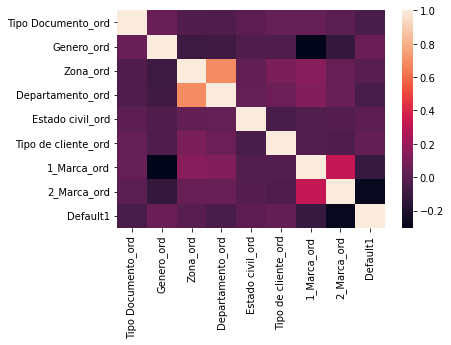

In [101]:
sns.heatmap(corr_df);

In [102]:
data = pd.concat([categorical_ord,data], axis = 1)

In [106]:
#Seleccionamos las variables que tienen mayor correlacion con la variable objetivo(Default)

data_final = data[['Edad (Segundo credito)','Personas a cargo','1_Cantidad Moras 30', '1_Cantidad Moras 60', '1_Cantidad Moras 90',
                   '1_Cantidad Moras Mayor 120', '1_Cantidad Moras 30 Ultimos 6 Meses','1_Cantidad Moras 60 Ultimos 6 Meses',
                   '1_Cantidad Moras 90 Ultimos 6 Meses','1_Cantidad Moras Mayor 120 Ultimos 6 Meses',
                   'Genero_ord','Tipo de cliente_ord', '1_Marca_ord', '2_Marca_ord']]

In [107]:
for label, content in data_final.items():
    print('Number of NaNs of {}: {}'.format(label, content.isna().sum() ))

Number of NaNs of Edad (Segundo credito): 0
Number of NaNs of Personas a cargo: 0
Number of NaNs of 1_Cantidad Moras 30: 0
Number of NaNs of 1_Cantidad Moras 60: 0
Number of NaNs of 1_Cantidad Moras 90: 0
Number of NaNs of 1_Cantidad Moras Mayor 120: 0
Number of NaNs of 1_Cantidad Moras 30 Ultimos 6 Meses: 0
Number of NaNs of 1_Cantidad Moras 60 Ultimos 6 Meses: 0
Number of NaNs of 1_Cantidad Moras 90 Ultimos 6 Meses: 0
Number of NaNs of 1_Cantidad Moras Mayor 120 Ultimos 6 Meses: 0
Number of NaNs of Genero_ord: 0
Number of NaNs of Tipo de cliente_ord: 0
Number of NaNs of 1_Marca_ord: 0
Number of NaNs of 2_Marca_ord: 0


In [108]:
data_final

,Edad (Segundo credito),Personas a cargo,1_Cantidad Moras 30,1_Cantidad Moras 60,1_Cantidad Moras 90,1_Cantidad Moras Mayor 120,1_Cantidad Moras 30 Ultimos 6 Meses,1_Cantidad Moras 60 Ultimos 6 Meses,1_Cantidad Moras 90 Ultimos 6 Meses,1_Cantidad Moras Mayor 120 Ultimos 6 Meses,Genero_ord,Tipo de cliente_ord,1_Marca_ord,2_Marca_ord
0,26,0,1,0,0,0,1,0,0,0,1.0,0.0,0.0,14.0
1,28,0,0,0,0,0,0,0,0,0,0.0,0.0,14.0,8.0
2,23,0,1,0,0,0,1,0,0,0,1.0,0.0,8.0,0.0
3,23,1,4,2,1,4,0,1,1,4,1.0,0.0,0.0,0.0
4,25,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,32,0,0,0,0,0,0,0,0,0,1.0,0.0,3.0,14.0
1566,27,1,0,0,0,0,0,0,0,0,1.0,1.0,14.0,11.0
1567,24,0,0,0,0,0,0,0,0,0,1.0,1.0,3.0,11.0
1568,29,0,0,0,0,0,0,0,0,0,1.0,1.0,3.0,11.0


## Regresion Logistica

 Con las 14 variables seleccionadas anteriormente, 10 numéricas y 4 categóricas, vamos a realizar una regresión logista para observar el p-value de las variables. 

In [109]:
X = np.asarray(data_final)
X = StandardScaler().fit(X).transform(X)
y = np.asarray(data.Default)

In [110]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1256, 14) (1256,)
Test set: (314, 14) (314,)


In [111]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
model = LogisticRegression(C=0.01, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [113]:
importance = model.coef_[0]

In [114]:
importance

array([-0.03723885,  0.14125106, -0.01199302,  0.07326251,  0.1610846 ,
        0.17888445,  0.18539578,  0.21964078,  0.42361517,  0.33297834,
        0.0939615 ,  0.05873604, -0.00411053, -0.29792827])

In [115]:
coeff = []
for num,c in enumerate(importance):
    coeff.append(c)
    print('{}, Variable # {}: , Coefficient: {}'.format(data_final.columns[num],num,c))

coeff = pd.Series(coeff, dtype='float64')
coeff.sort_values(ascending=False)

Edad (Segundo credito), Variable # 0: , Coefficient: -0.037238852899123195
Personas a cargo, Variable # 1: , Coefficient: 0.1412510608520715
1_Cantidad Moras 30, Variable # 2: , Coefficient: -0.011993021019586107
1_Cantidad Moras 60, Variable # 3: , Coefficient: 0.07326251082975271
1_Cantidad Moras 90, Variable # 4: , Coefficient: 0.16108459706119244
1_Cantidad Moras Mayor 120, Variable # 5: , Coefficient: 0.1788844453447349
1_Cantidad Moras 30 Ultimos 6 Meses, Variable # 6: , Coefficient: 0.18539577775251817
1_Cantidad Moras 60 Ultimos 6 Meses, Variable # 7: , Coefficient: 0.2196407831484408
1_Cantidad Moras 90 Ultimos 6 Meses, Variable # 8: , Coefficient: 0.42361516709332103
1_Cantidad Moras Mayor 120 Ultimos 6 Meses, Variable # 9: , Coefficient: 0.3329783387436947
Genero_ord, Variable # 10: , Coefficient: 0.09396150327951923
Tipo de cliente_ord, Variable # 11: , Coefficient: 0.05873603813080394
1_Marca_ord, Variable # 12: , Coefficient: -0.004110527150279477
2_Marca_ord, Variable # 

8     0.423615
9     0.332978
7     0.219641
6     0.185396
5     0.178884
4     0.161085
1     0.141251
10    0.093962
3     0.073263
11    0.058736
12   -0.004111
2    -0.011993
0    -0.037239
13   -0.297928
dtype: float64

In [31]:
def roc(y_test,y_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label='Curva ROC (AUC = {})'.format(auc))
    plt.plot([0, 1], [0, 1], 'r--', label='Clasificador aleatorio')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

 

A continuación, vamos a usar algunos de los algoritmos clásicos de machine learning más populares con el fin de ver cual tiene mejor desempeño a la hora de predecir la variable default. 

****Results****
LinearDiscriminantAnalysis
confusion_matrix
[[213  15]
 [ 31  55]]
Accuracy: 85.3503%
precision_score: 85.3503%
f1_score: 70.5128%
Log Loss: 0.4264827474764394


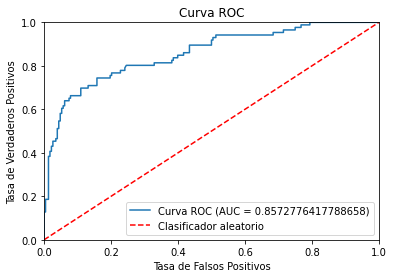

ceros = 213, unos = 55
****Results****
QuadraticDiscriminantAnalysis
confusion_matrix
[[206  22]
 [ 30  56]]
Accuracy: 83.4395%
precision_score: 83.4395%
f1_score: 68.2927%
Log Loss: 1.5703983907693515


/tmp/ipykernel_53793/177164851.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_entry)


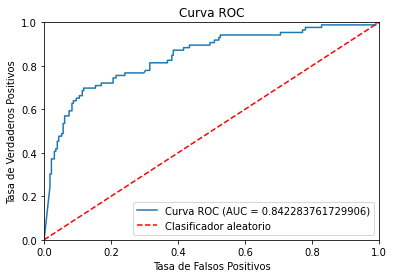

ceros = 206, unos = 56
****Results****
KNeighborsClassifier
confusion_matrix
[[209  19]
 [ 43  43]]
Accuracy: 80.2548%
precision_score: 80.2548%
f1_score: 58.1081%
Log Loss: 4.917467819518328


/tmp/ipykernel_53793/177164851.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_entry)


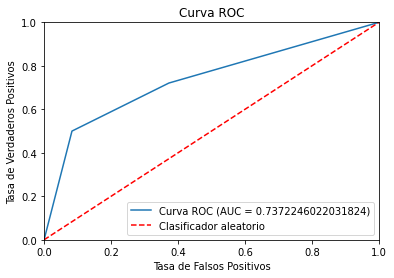

ceros = 209, unos = 43
****Results****
DecisionTreeClassifier
confusion_matrix
[[193  35]
 [ 25  61]]
Accuracy: 80.8917%
precision_score: 80.8917%
f1_score: 67.0330%
Log Loss: 6.403051036748776


/tmp/ipykernel_53793/177164851.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_entry)


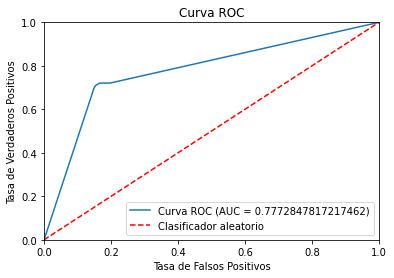

ceros = 193, unos = 61


/tmp/ipykernel_53793/177164851.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_entry)


****Results****
SVC
confusion_matrix
[[213  15]
 [ 39  47]]
Accuracy: 82.8025%
precision_score: 82.8025%
f1_score: 63.5135%
Log Loss: 0.442928513429847


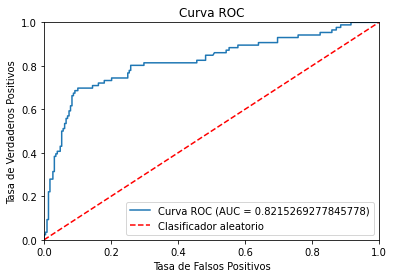

ceros = 213, unos = 47


/tmp/ipykernel_53793/177164851.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_entry)


****Results****
RandomForestClassifier
confusion_matrix
[[202  26]
 [ 31  55]]
Accuracy: 81.8471%
precision_score: 81.8471%
f1_score: 65.8683%
Log Loss: 0.45911964568594


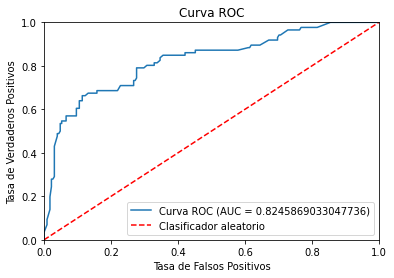

ceros = 202, unos = 55


/tmp/ipykernel_53793/177164851.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_entry)


****Results****
GradientBoostingClassifier
confusion_matrix
[[211  17]
 [ 31  55]]
Accuracy: 84.7134%
precision_score: 84.7134%
f1_score: 69.6203%
Log Loss: 0.4066092585908024


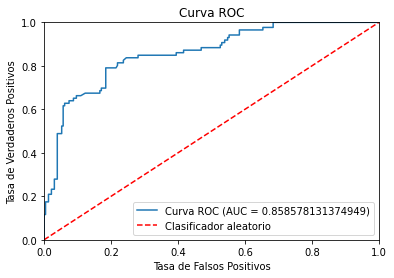

ceros = 211, unos = 55


/tmp/ipykernel_53793/177164851.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_entry)


In [32]:
classifiers = [LinearDiscriminantAnalysis(),
QuadraticDiscriminantAnalysis(),
KNeighborsClassifier(2),
DecisionTreeClassifier(),
SVC(kernel="rbf", C=0.025, probability=True),
RandomForestClassifier(),
GradientBoostingClassifier()]

col_names = ["Model", "Accuracy", "Log Loss"]
df_results = pd.DataFrame(columns=col_names)
predictions = []
for model in classifiers:
    
    name = model.__class__.__name__
    model.fit(X_train, y_train)
    
    print('****Results****')
    print(name)
    print('confusion_matrix')
    train_predictions = model.predict(X_test)
    cf = confusion_matrix(y_test, train_predictions)
    print(cf)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = model.predict(X_test)
    precision = accuracy_score(y_test, train_predictions)
    print("precision_score: {:.4%}".format(precision))
    train_predictions = model.predict(X_test)
    f1 = f1_score(y_test, train_predictions)
    print("f1_score: {:.4%}".format(f1))    
    train_predictions = model.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    y_prob_positive = train_predictions[:, 1]
    roc(y_test,y_prob_positive)
    
    train_predictions = model.predict(X_test)
    ceros = 0
    unos = 0
    for i in range(len(train_predictions)):
        if train_predictions[i] == 0:
            if train_predictions[i] == y_test[i]:
                ceros += 1
        else:
            if train_predictions[i] == y_test[i]:
                unos += 1
                
                
    print('ceros = {}, unos = {}'.format(ceros,unos))
            
    df_entry = pd.DataFrame([[name, acc*100, ll]], columns=col_names)
    df_results = df_results.append(df_entry)

Hasta este punto los algortimos que mostraron mejor desempeño fueron el LDA y el GradientBoostingClassifier. Sin embargo, vamos a implementar una red neuronal
usando la libreria de pytorch con el fin de mojar los resultados anteriores

### Red Neuronal

In [116]:
#Importamos las librerias de pytorch
import torch as T
import torch.multiprocessing as mp
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical

In [117]:
#Creamos la clase Model, la cual contiene las estructura de la red neuronal

class Model(nn.Module):
    def __init__(self, input_dims):
        super(Model, self).__init__()

        self.fc1 = nn.Linear(input_dims, 32)
        self.d1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(32, 64)
        self.d2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 128)
        self.d3 = nn.Dropout(0.1)
        self.fc4 = nn.Linear(128, 64)
        self.d4 = nn.Dropout(0.2)
        self.fc5 = nn.Linear(64, 32)
        self.d5 = nn.Dropout(0.4)
        self.fc6 = nn.Linear(32, 16)
        self.v = nn.Linear(16, 2)
        

    def forward(self, state):
        
       
        output = T.relu(self.fc1(state))
        output = self.d1(output)
        output = T.relu(self.fc2(output))
        output = self.d2(output)
        output = T.relu(self.fc3(output))
        output = self.d3(output)
        output = T.relu(self.fc4(output))
        output = self.d4(output)
        output = T.relu(self.fc5(output))
        output = self.d5(output)
        output = T.relu(self.fc6(output))
        result = self.v(output)

        return result

In [118]:
#Creamos la clase Optimization, la cual se encarga de entrenar el modelo y acutualizar los pesos de la red en cada epoca

class Optimization:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
    
    def train_step(self, x, y):
        # Sets model to train mode
        self.model.train()
        yhat = self.model(x)
        y=y.ravel() 
        y = y.long()
        loss = self.loss_fn(yhat, y)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()
    
    
    def train(self, train_loader, val_loader, batch_size= 64, n_epochs=50, n_features=1):
        print('batch_size', batch_size)
        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch
                y_batch = y_batch
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with T.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val
                    y_val = y_val
                    y_val=y_val.ravel() 
                    y_val = y_val.long()
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(yhat, y_val)
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            if (epoch % 10 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
                )
        
        T.save(self.model.state_dict(),'models_prueba.zip')
    
    def evaluate(self, test_loader, batch_size=1, n_features=1):
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())

        return predictions, values
    
    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

In [119]:
from torch.utils.data import TensorDataset, DataLoader

batch_size_n = 32
#batch_size_n_test = len(x_test)


train_features = T.Tensor(X_train)
train_targets = T.Tensor(y_train)
val_features = T.Tensor(X_test)
val_targets = T.Tensor(y_test)


train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)

train_loader = DataLoader(train, batch_size=batch_size_n, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size_n, shuffle=False, drop_last=True)

batch_size 32
[10/150] Training loss: 0.4958	 Validation loss: 0.4595
[20/150] Training loss: 0.4423	 Validation loss: 0.4076
[30/150] Training loss: 0.4208	 Validation loss: 0.4106
[40/150] Training loss: 0.4330	 Validation loss: 0.4133
[50/150] Training loss: 0.4223	 Validation loss: 0.4136
[60/150] Training loss: 0.4092	 Validation loss: 0.4153
[70/150] Training loss: 0.4165	 Validation loss: 0.4171
[80/150] Training loss: 0.4116	 Validation loss: 0.4183
[90/150] Training loss: 0.4159	 Validation loss: 0.4193
[100/150] Training loss: 0.4097	 Validation loss: 0.4195
[110/150] Training loss: 0.4092	 Validation loss: 0.4188
[120/150] Training loss: 0.4061	 Validation loss: 0.4189
[130/150] Training loss: 0.4004	 Validation loss: 0.4176
[140/150] Training loss: 0.3998	 Validation loss: 0.4184
[150/150] Training loss: 0.3961	 Validation loss: 0.4160


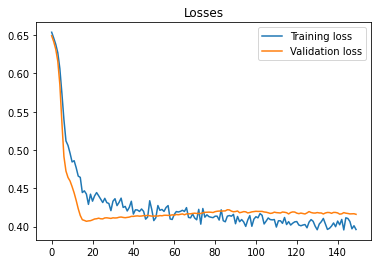

In [120]:
import torch.optim as optim

#Ajustamos los hiperparametros y entrenamos el modelos

batch_size = batch_size_n
n_epochs = 150
input_dims = 14
learning_rate = 1e-4
weight_decay = 1e-6

model = Model(input_dims = input_dims)

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
loss_fn = T.nn.CrossEntropyLoss()

opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features = input_dims )
opt.plot_losses()

In [121]:
# Resultados en los datos de Train
model.eval()
yhat_train = model(train_features)

Directions_train = []
for row in range(len(yhat_train)):
    predicted_train = T.softmax(yhat_train[row], dim=0)
    #print(predicted_train)
    action_train = T.argmax(predicted_train)
    Directions_train.append(action_train.item())

In [122]:
print('****Results****')
cf = confusion_matrix(y_train, Directions_train)
print(cf)
acc = accuracy_score(y_train, Directions_train)
print("Accuracy: {:.4%}".format(acc))
f1 = f1_score(y_train, Directions_train)
print("f1_score: {:.4%}".format(f1))    
ll = log_loss(y_train, Directions_train)
print("Log Loss: {}".format(ll))

****Results****
[[858  33]
 [140 225]]
Accuracy: 86.2261%
f1_score: 72.2311%
Log Loss: 4.757352470569064


In [123]:
# Resultados en los datos de Test
model.eval()
yhat = model(val_features)
Directions = []
for row in range(len(yhat)):
    predicted = T.softmax(yhat[row], dim=0)
    #print(predicted)
    action = T.argmax(predicted)
    Directions.append(action.item())

In [124]:
print('****Results****')
cf = confusion_matrix(y_test, Directions)
print(cf)
acc = accuracy_score(y_test, Directions)
print("Accuracy: {:.4%}".format(acc))
f1 = f1_score(y_test, Directions)
print("f1_score: {:.4%}".format(f1))    
ll = log_loss(y_test, Directions)
print("Log Loss: {}".format(ll))

****Results****
[[211  17]
 [ 34  52]]
Accuracy: 83.7580%
f1_score: 67.0968%
Log Loss: 5.609844551900504


Los resultados de la red son buenos, pero con esta estructura no superan los resultados del LDA y el GradientBoostingClassifier. Por tanto, en estos casos los algoritmos más simples son más parsimoniosos, ya que generan mejores resultados y no son tan computacionalmente costosos a la hora de realizar su entrenamiento. 